# Software Language Classification
By Michael Wadieh

## Import Libraries

In [37]:
# import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

## Retrieving Data using BeautifulSoup

In [38]:
# storing data GitHub web addresses in dictionary
code_links = {
    'webpage':["https://raw.githubusercontent.com/mwadieh/multiresolution-blending-with-pyramids/main/multiresolution_blending.py",
               "https://raw.githubusercontent.com/TheAlgorithms/Java/master/src/main/java/com/thealgorithms/backtracking/KnightsTour.java",
               "https://raw.githubusercontent.com/mwadieh/walmart-stores-sales-analysis/main/walmart_analysis_MW.R",            
               "https://raw.githubusercontent.com/json-iterator/java/master/src/main/java/com/jsoniter/CodegenImplMap.java",          
               "https://raw.githubusercontent.com/json-iterator/iap-tools-java-benchmarks/master/src/main/java/com/jenkov/iap/ion/performance/IapReadLengthBenchmarks.java",
               "https://raw.githubusercontent.com/bhaktigokhale/javawithbhawana/master/BhaktiGokhale/LoginLogoutDemoUsingServlet/SimpleLoginApplication/src/com/LoginServlet.java",
               "https://raw.githubusercontent.com/jonasermert/Virtual-Key-for-Your-Repositories/main/File.java",
               "https://raw.githubusercontent.com/josephpconley/R/master/craps.R",
               "https://raw.githubusercontent.com/pytorch/extension-cpp/master/python/lltm_baseline.py",
               "https://raw.githubusercontent.com/joeyajames/Java/master/LinkedList.java",
               "https://raw.githubusercontent.com/shadman-a/typeConversion/master/src/main/java/typeConversion/Experiments.java",
               "https://raw.githubusercontent.com/flaichi/Simplilearn-JFS-Project/master/src/RemoveFile.java",
               "https://raw.githubusercontent.com/datadolphyn/R/master/ClassifyData.R",
               "https://raw.githubusercontent.com/ShilpiGP/Simplilearn_19Sep_JavaBasic/main/JavaBasic/src/demo3/Test3.java",
               "https://raw.githubusercontent.com/joonlee7/JavaScript_Sessions/master/Objects/constructor_demo.js",
               "https://raw.githubusercontent.com/trevorstephens/titanic/master/Tutorial5.R",
               "https://raw.githubusercontent.com/joonlee7/JavaScript_Sessions/master/Fundamentals/myscript.js",
               "https://raw.githubusercontent.com/flaichi/Simplilearn-JFS-Project/master/src/AddFile.java",
               "https://raw.githubusercontent.com/grpc/grpc/master/setup.py",
               "https://raw.githubusercontent.com/flaichi/Simplilearn-JFS-Project/master/src/App.java",
               "https://raw.githubusercontent.com/ncornwell/R/master/AppleTestRun.R",
               "https://raw.githubusercontent.com/SRILEKHA-V19/Java-FSD-Simplilearn/main/Phase1/VirtualKey_Phase1/src/StartClass.java",
               "https://raw.githubusercontent.com/xavierd/clang_complete/master/rplugin/python3/deoplete/sources/clang_complete.py",
               "https://raw.githubusercontent.com/ShilpiGP/Simplilearn_19Sep_JavaBasic/main/JavaBasic/src/demo3/A.java",
               "https://raw.githubusercontent.com/joonlee7/JavaScript_Sessions/master/Asynchronous/read_file_async_demo.js",
               "https://raw.githubusercontent.com/joonlee7/JavaScript_Sessions/master/Objects/objects_demo.js",
               "https://raw.githubusercontent.com/grpc/grpc/master/src/objective-c/change-comments.py",
               "https://raw.githubusercontent.com/dongweiming/r/master/config.py",
               "https://raw.githubusercontent.com/joeyajames/Java/master/MyIterator.java"
              ]
}

# create pandas dataframe
df = pd.DataFrame(code_links)

# retrieving code text using BeautifulSoup 
def get_soup_text(webpage):
    url = requests.get(webpage)
    src = url.content
    soup = BeautifulSoup(src,'html.parser')
    
    return soup.text

# creating code variable with get_soup_text
df['code'] = df['webpage'].apply(get_soup_text)

# create language variable for dataframe
language = []
for page in df['webpage']:
    if page.endswith('.java'):
        language += ['Java']
    else:
        language += ['Other']

df['language'] = language


df.head()

,webpage,code,language
0,https://raw.githubusercontent.com/mwadieh/mult...,"# -*- coding: utf-8 -*-\r\n""""""\r\nCreated on S...",Other
1,https://raw.githubusercontent.com/TheAlgorithm...,package com.thealgorithms.backtracking;\n\nimp...,Java
2,https://raw.githubusercontent.com/mwadieh/walm...,# loading dependencies\r\nlibrary(plyr)\r\nlib...,Other
3,https://raw.githubusercontent.com/json-iterato...,package com.jsoniter;\n\nimport com.jsoniter.s...,Java
4,https://raw.githubusercontent.com/json-iterato...,package com.jenkov.iap.ion.performance;\n\nimp...,Java


## Data Exploration

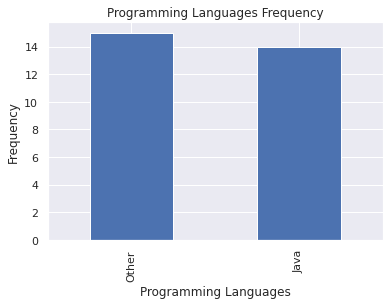

In [39]:
# Checking Frequency/Counts of Programming Languages
df['language'].value_counts().plot(kind = 'bar')
plt.title('Programming Languages Frequency')
plt.xlabel('Programming Languages')
plt.ylabel('Frequency');

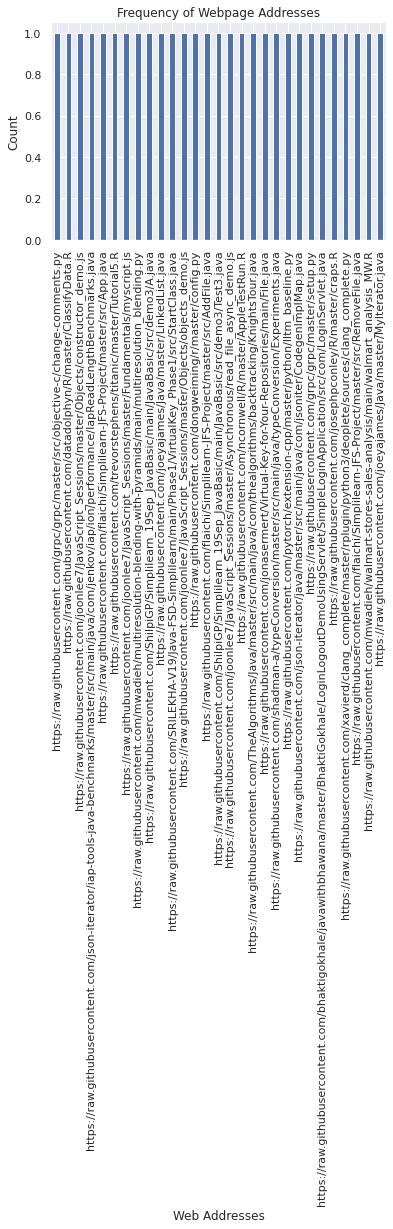

In [40]:
# checking for duplicate web pages
df['webpage'].value_counts().plot(kind = 'bar')
plt.title("Frequency of Webpage Addresses")
plt.ylabel("Count")
plt.xlabel("Web Addresses");

In [41]:
# get feature counts from tokens for Exploratory Data Analysis
def get_token_counts(data):
    token_pattern = r"""([A-Za-z_]\w*\b|[!\#\$%\&\*\+:\-\./<=>\?@\\\^_\|\~]+|[ \t\(\),;\{\}\[\]`"'])"""
    tk = RegexpTokenizer(token_pattern,gaps = False)

    tokens = [tk.tokenize(x) for x in data['code']]
    token_array = []
    for i in tokens:
        token_array += i

    counter_list = Counter(token_array)

    # 20 most common features
    print(counter_list.most_common(20))
    
    # plotting most common words
    fdist_toxic = FreqDist(counter_list)
    fdist_toxic.plot(10)
    plt.show()

[(' ', 17350), (')', 1403), ('(', 1402), ('.', 1218), (',', 1042), ('"', 885), ("'", 732), ('=', 619), ('\t', 500), (';', 432), ('#', 320), ('[', 286), (']', 286), (':', 282), ('{', 259), ('}', 258), ('-', 244), ('<-', 150), ('%', 142), ('+', 140)]


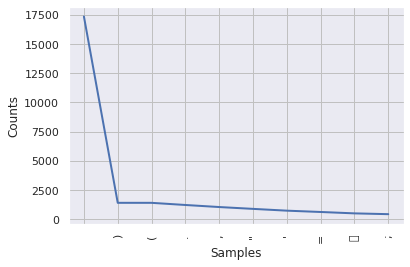

In [42]:
# show most common tokens for df (before filetering features in tfidf with min_df = 2)
get_token_counts(df)

[(' ', 7277), ('.', 501), ('\t', 490), (')', 426), ('(', 425), (';', 410), ('"', 244), ('{', 167), ('}', 167), ('=', 125), (',', 111), ('System', 81), ('out', 79), ('println', 72), ('int', 69), ('[', 64), (']', 64), (':', 57), ('//', 54), ('public', 53)]


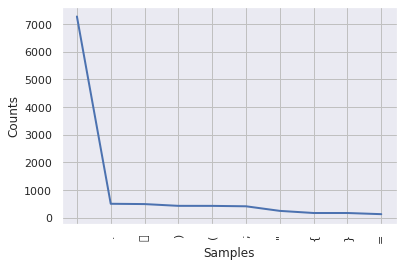

In [43]:
# show most common tokens for java_df (before filetering features in tfidf)
java_df = df[df['language']=='Java']
get_token_counts(java_df)

[(' ', 10073), ('(', 977), (')', 977), (',', 931), ("'", 726), ('.', 717), ('"', 641), ('=', 494), ('#', 320), (':', 225), ('[', 222), (']', 222), ('-', 210), ('<-', 150), ('%', 140), ('$', 129), ('+', 104), ('in', 101), ('/', 93), ('{', 92)]


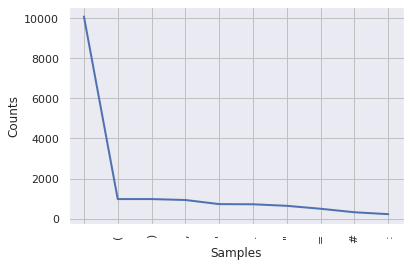

In [44]:
# show most common tokens for other_df (before filetering features in tfidf)
other_df = df[df['language']=='Other']
get_token_counts(other_df)

## Data Manipulation

### Split Data into Training and Testing Data Sets

In [45]:
# selecting X and y values
X = df['code']
y = df['language']

# spliting data into training and testing datasets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=0)

### Tfidf Vectorizer and Tokenizer
We can use TFidfVectorizer() to capture features that appear in 2 or more documents. This should help us get rid of variables names that are unique to only one document. This will help clean our data. 

In [46]:
# pattern for recognizing tokens
token_pattern = r"""([A-Za-z_]\w*\b|[!\#\$%\&\*\+:\-\./<=>\?@\\\^_\|\~]+|[ \t\(\),;\{\}\[\]`"'])"""

# creating vectorizer
vectorizer = TfidfVectorizer(token_pattern = token_pattern, 
                             max_features = 3000, 
                             min_df = 2, lowercase = False,
                             stop_words=[' ','\t']) 

# generate unique tokens
vectorizer.fit(xtrain)

# create function to extract features (will reuse this on test data)
def get_features(code_data,fitted_vectorizer):
    
    # create scipy.sparse.csr.csr_matrix for features
    features = fitted_vectorizer.transform(code_data)
    # get feature names
    feature_names = vectorizer.get_feature_names()
    # converts to a numpy.matrix
    feature_values = features.todense().tolist()
    # convert numpy matrix to pandas Data Frame object
    feature_df = pd.DataFrame(feature_values,columns=feature_names)

    return feature_df
    
# call get_features function
feature_train_df = get_features(xtrain,vectorizer)

feature_train_df.head()

,!,!!,!=,"""",#,$,%,&,&&,',(,),*,*/,+,++,+=,",",-,->,.,.*,...,.__,/,/%,/*,/**,//,:,://,;,<,<-,<=,<>,=,==,>,>=,...,then,there,this,throws,title,to,toString,true,try,txt,under,use,user,usr,utf,util,value,values,var,variable,void,w,when,where,which,while,will,with,without,write,writing,www,x,y,you,z,{,|,||,}
0,0.0,0.0,0.000000,0.047507,0.069974,0.000000,0.039426,0.000000,0.000000,0.854760,0.052989,0.052989,0.094328,0.000000,0.000000,0.0,0.0,0.172797,0.027183,0.0,0.128902,0.000000,0.000000,0.000000,0.000000,0.054392,0.0,0.000000,0.000000,0.187948,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.141303,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.084297,0.0,0.000000,0.000000,0.098621,0.000000,0.054392,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.020021,0.0,0.000000,0.020021
1,0.0,0.0,0.000000,0.292056,0.286782,0.018594,0.000000,0.000000,0.000000,0.035031,0.369186,0.369186,0.025773,0.032317,0.089126,0.0,0.0,0.086557,0.011141,0.0,0.203770,0.017274,0.018594,0.000000,0.054306,0.000000,0.0,0.055782,0.012257,0.196851,0.017274,0.010174,0.014339,0.0,0.0,0.0,0.065150,0.024513,0.000000,0.000000,...,0.0,0.0,0.016158,0.000000,0.0,0.040729,0.0,0.000000,0.000000,0.0,0.060628,0.022292,0.000000,0.022292,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.020209,0.0,0.000000,0.0,0.051823,0.0,0.051823,0.0,0.074376,0.022292,0.022292,0.0,0.0,0.022292,0.000000,0.008206,0.0,0.000000,0.008206
2,0.0,0.0,0.098242,0.265758,0.000000,0.000000,0.000000,0.126779,0.076067,0.053128,0.296420,0.296420,0.014658,0.000000,0.050688,0.0,0.0,0.044752,0.012672,0.0,0.506475,0.000000,0.000000,0.000000,0.046327,0.000000,0.0,0.000000,0.013941,0.019470,0.019648,0.451325,0.000000,0.0,0.0,0.0,0.164678,0.000000,0.000000,0.022987,...,0.0,0.0,0.000000,0.025356,0.0,0.000000,0.0,0.039297,0.058945,0.0,0.000000,0.000000,0.114935,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.013941,0.000000,0.0,0.025356,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.140001,0.0,0.000000,0.140001
3,0.0,0.0,0.000000,0.000000,0.000000,0.061465,0.000000,0.000000,0.000000,0.540401,0.311078,0.311078,0.000000,0.026707,0.000000,0.0,0.0,0.104045,0.000000,0.0,0.361739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.030732,0.040515,0.042438,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.155539,0.000000,0.000000,0.000000,...,0.0,0.0,0.267066,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.061465,0.0,0.033402,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.122060,0.0,0.122929,0.122060
4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377838,0.377838,0.194022,0.000000,0.055913,0.0,0.0,0.402815,0.044730,0.0,0.386343,0.000000,0.000000,0.020285,0.013627,0.000000,0.0,0.000000,0.000000,0.171817,0.000000,0.000000,0.014393,0.0,0.0,0.0,0.319709,0.000000,0.017339,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.182567,0.000000,0.0,0.000000,0.000000


## Classification Model

              precision    recall  f1-score   support

        Java       1.00      1.00      1.00        11
       Other       1.00      1.00      1.00        12

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



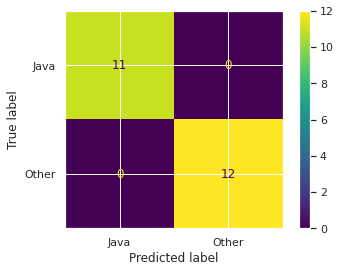

In [47]:
# create classification model  
clf = SVC(C=1000,kernel='linear')
clf.fit(feature_train_df.values,ytrain)

# check model performance on training data
ypred_train = clf.predict(feature_train_df)
print(classification_report(ytrain,ypred_train,zero_division = 0))

cm = confusion_matrix(ytrain,ypred_train, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

        Java       1.00      1.00      1.00         3
       Other       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

1.0


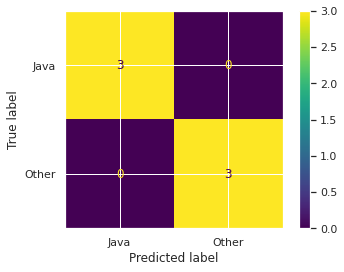

In [48]:
# getting features for raw test data
xtest_vectorized = get_features(xtest,vectorizer)

# check model performance on test data
ypred_test = clf.predict(xtest_vectorized)
print(classification_report(ytest,ypred_test))
print(clf.score(xtest_vectorized,ytest))

cm = confusion_matrix(ytest,ypred_test, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

## Next Steps
- Add more data.
- Explore more data cleaning options.
- Adjust TfidfVectorizer() parameters.
- Perform Hyperparameter tunning to obtain best estimator.
- Get someone else to double-check my work.
- Build model into a user-friendly application.